In [52]:
# Importing libraries and packages

# %load_ext autoreload
# %autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.utils import shuffle
import os


In [33]:
# Importing returned and non-returned patients datasets

path = "C:/Users/phuro/UCSD/Project_WHEL/data"

returned_fp = os.path.join(path, 'Preprocessed-Data', 'returners.csv')
returned = pd.read_csv(returned_fp).iloc[:, 1:8]

unreturned_fp = os.path.join(path, 'Preprocessed-Data', 'non_returners.csv')
unreturned = pd.read_csv(unreturned_fp).iloc[:, 1:8]

print(returned.shape)
print(unreturned.shape)

returned.head()

(1989, 7)
(872, 7)


,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status
0,1018,56,58,1,5,2,1
1,1019,67,71,1,7,4,0
2,1022,50,53,1,7,4,1
3,1026,51,52,1,7,2,1
4,1027,64,67,1,7,2,0


In [34]:
unreturned.head()

,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status
0,1003,51,53,1,8,2,1
1,1011,42,42,5,7,2,1
2,1017,45,45,1,9,2,1
3,1034,61,62,1,5,4,0
4,1039,42,43,1,7,1,1


In [35]:
# Importing endpoints dataset (conclusion statistics at end of study)

ep_fp = os.path.join(path, 'endpoints.xls')
ep = pd.read_excel(ep_fp).iloc[:, [0, 14]]
ep.rename(columns={'id': 'ID'}, inplace=True)
ep.head()


,ID,site0
0,1002,1
1,1003,1
2,1005,1
3,1007,1
4,1008,1


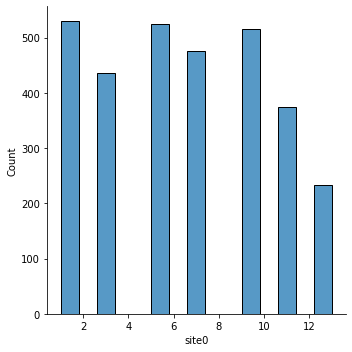

In [36]:
# 15.  Excel Column O
# 	WHEL Clinical Site
# 		1 Site A in California
# 		3 Site B in California
# 		5 Site C in California
# 		7 Site in Arizona
# 		9 Site D in California
# 		11 Site in Texas
# 		13 Site in Oregon

sns.displot(ep['site0'])

In [37]:
# Merge returners and nonreturners with ep 

returners = returned.merge(ep, on='ID', how='inner')
print(returners.shape)

nonreturners = unreturned.merge(ep, on='ID', how='inner')
print(nonreturners.shape)


(1989, 8)
(872, 8)


In [38]:
# Replacing study site numeric codes to state strings/names

returners['site'] = returners['site0'].replace({1: 'CA', 3: 'CA', 5: 'CA', \
    7: 'AZ', 9: 'CA', 11: 'TX', 13: 'OR'})
returners.drop(columns=['site0'], inplace=True)

nonreturners['site'] = nonreturners['site0'].replace({1: 'CA', 3: 'CA', 5: 'CA', \
    7: 'AZ', 9: 'CA', 11: 'TX', 13: 'OR'})
nonreturners.drop(columns=['site0'], inplace=True)

In [39]:
def plot_dist(df, col, title="", y_log_scale=False):

    """

    Function to plot the distribution of column {col}

    Args:
        df (DataFrame): dataframe to plot
        col (str): name of column to plot distribution
        y_log_scale (bool): whether y-axis (count) should be in log scale
        title: specified title for plot

    Return:
        A seaborn plot of the distribution of column {col}

    """

    if y_log_scale:
        p = sns.displot(df[col], log_scale=[False, True])
        p.set(xlabel=col, ylabel='count in log scale')
    else:
        p = sns.displot(df[col])
        p.set_axis_labels(xlabel=col, ylabel='count')
    
    p.set(title=title if len(title) > 0 else f'{col} distribution')

    return p

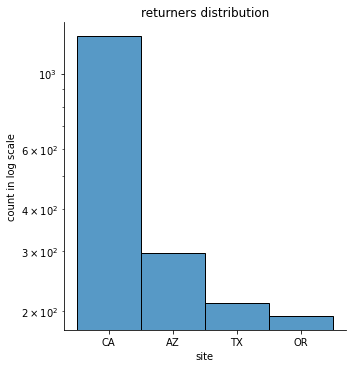

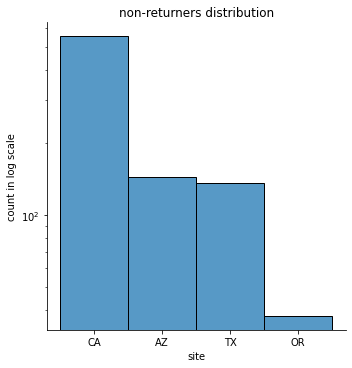

In [40]:
plot_dist(returners, 'site', 'returners distribution', y_log_scale=True)
plot_dist(nonreturners, 'site', 'non-returners distribution', y_log_scale=True)

In [41]:
returners['status'] = ['returned']*returners.shape[0]
nonreturners['status'] = ['unreturned']*nonreturners.shape[0]

df = pd.concat([returners, nonreturners], ignore_index=True)
df = shuffle(df)
df

,ID,age at dx,age at rand,Ethnicity,Education,Marital Status,Empl. Status,site,status
1003,7112,59,61,1,7,2,1,AZ,returned
535,3359,47,50,1,8,4,1,CA,returned
823,5385,57,58,1,7,2,0,CA,returned
1835,13049,40,43,1,8,4,1,OR,returned
1539,9470,45,49,1,9,2,1,CA,returned
...,...,...,...,...,...,...,...,...,...
1603,11043,44,47,1,7,1,1,TX,returned
2701,11031,49,52,1,7,2,0,TX,unreturned
725,5216,41,45,1,5,2,1,CA,returned
660,5091,49,50,1,6,1,1,CA,returned


In [42]:
data = df[['site', 'status']].reset_index(drop=True)
data

,site,status
0,AZ,returned
1,CA,returned
2,CA,returned
3,OR,returned
4,CA,returned
...,...,...
2856,TX,returned
2857,TX,unreturned
2858,CA,returned
2859,CA,returned


In [43]:
# Wk 5 mtg notes
# multiple hypothesis tests correction, controlling FDR rate
# q value from p value

# Wk 6 mtg notes
# Try out gz-file
# >>> import pickle
# >>> import gzip
# >>> data = [1, 2, 3, 4, 5] * 10000
# >>> pkl_file = open('data.pkl', 'wb')
# >>> pickle.dump(data, pkl_file); pkl_file.close()
# >>> pkl_gz_file = gzip.open('data.pkl.gz', 'wb')
# >>> pickle.dump(data, pkl_gz_file); pkl_gz_file.close()

In [51]:
os.chdir("C:/Users/phuro/UCSD/Project_WHEL/data")
wp = os.path.join('interim', 'return_status_by_site.csv')
data.to_csv(wp)
